# Bước 1: Import thư viện

In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

# Bước 2: Đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# đọc dữ liệu từ file csv
df = pd.read_csv('/content/drive/MyDrive/Test for LSTM/XAU_USD (1.2.1970-1.1.2025) - VI.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

           Ngày  Lần cuối        Mở       Cao      Thấp
0    01/12/2024  2,623.81  2,653.82  2,726.31  2,583.49
1    01/11/2024  2,653.55  2,742.50  2,762.30  2,536.90
2    01/10/2024  2,743.80  2,635.41  2,790.41  2,604.15
3    01/09/2024  2,634.49  2,502.74  2,685.96  2,471.95
4    01/08/2024  2,503.03  2,448.10  2,532.05  2,364.40
..          ...       ...       ...       ...       ...
654  01/06/1970     35.75     35.60     35.75     35.75
655  01/05/1970     35.85     36.15     35.85     35.85
656  01/04/1970     36.10     35.55     36.10     36.10
657  01/03/1970     35.50     35.15     35.50     35.50
658  01/02/1970     35.20     35.25     35.20     35.20

[659 rows x 5 columns]


# Bước 3: Mô tả dữ liệu

In [ ]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [ ]:
#kích thước dữ liệu
df.shape

(659, 5)

In [ ]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp
0,2024-12-01,"2,623.81","2,653.82","2,726.31","2,583.49"
1,2024-11-01,"2,653.55","2,742.50","2,762.30","2,536.90"
2,2024-10-01,"2,743.80","2,635.41","2,790.41","2,604.15"
3,2024-09-01,"2,634.49","2,502.74","2,685.96","2,471.95"
4,2024-08-01,"2,503.03","2,448.10","2,532.05","2,364.40"


In [ ]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ngày      659 non-null    datetime64[ns]
 1   Lần cuối  659 non-null    object        
 2   Mở        659 non-null    object        
 3   Cao       659 non-null    object        
 4   Thấp      659 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 25.9+ KB


In [ ]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,659
mean,1997-07-01 13:08:49.893778432
min,1970-02-01 00:00:00
25%,1983-10-16 12:00:00
50%,1997-07-01 00:00:00
75%,2011-03-16 12:00:00
max,2024-12-01 00:00:00


# Bước 4: Tiền xử lý dữ liệu

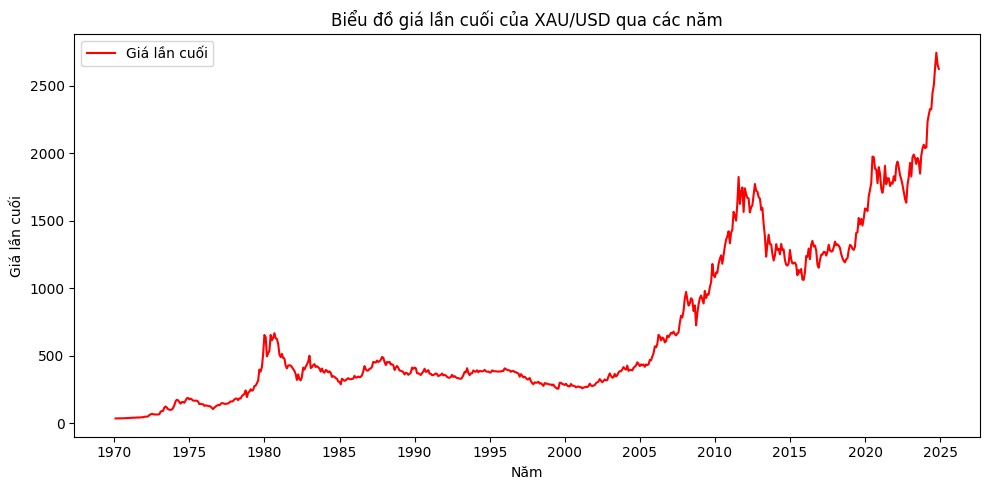

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Lần cuối'] = df['Lần cuối'].astype(str).str.replace(',', '').astype(float)
df['Mở'] = df['Mở'].astype(str).str.replace(',', '').astype(float)
df['Cao'] = df['Cao'].astype(str).str.replace(',', '').astype(float)
df['Thấp'] = df['Thấp'].astype(str).str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Lần cuối'], label='Giá lần cuối', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá lần cuối')
plt.title('Biểu đồ giá lần cuối của XAU/USD qua các năm')
plt.legend(loc='best')

years = YearLocator(base=5)

# Định dạng đồ thị hiển thị các ngày tháng theo năm
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.tight_layout()
plt.show()


In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Lần cuối'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Lần cuối
Ngày,
1970-02-01,35.20
1970-03-01,35.50
1970-04-01,36.10
1970-05-01,35.85
1970-06-01,35.75
...,...
2024-08-01,2503.03
2024-09-01,2634.49
2024-10-01,2743.80


In [ ]:
#chia tập dữ liệu
data = df1.values
train_data = data[:550]
test_data = data[550:]

In [ ]:
data

array([[  35.2 ],
       [  35.5 ],
       [  36.1 ],
       [  35.85],
       [  35.75],
       [  35.55],
       [  36.1 ],
       [  36.65],
       [  37.55],
       [  37.8 ],
       [  37.65],
       [  38.35],
       [  39.1 ],
       [  39.15],
       [  39.95],
       [  41.15],
       [  40.4 ],
       [  42.7 ],
       [  41.  ],
       [  42.9 ],
       [  42.65],
       [  43.95],
       [  43.85],
       [  47.45],
       [  48.5 ],
       [  48.65],
       [  49.9 ],
       [  59.75],
       [  64.95],
       [  68.6 ],
       [  67.15],
       [  64.5 ],
       [  64.65],
       [  63.9 ],
       [  65.2 ],
       [  66.3 ],
       [  85.3 ],
       [  90.3 ],
       [  91.  ],
       [ 115.05],
       [ 123.55],
       [ 115.9 ],
       [ 103.8 ],
       [ 100.3 ],
       [  98.3 ],
       [ 101.25],
       [ 112.3 ],
       [ 132.8 ],
       [ 162.8 ],
       [ 173.3 ],
       [ 169.55],
       [ 157.25],
       [ 144.55],
       [ 156.5 ],
       [ 156.3 ],
       [ 1

In [ ]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [ ]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train

[array([0.        , 0.00011076, 0.00033227, 0.00023998, 0.00020306,
        0.00012922, 0.00033227, 0.00053533, 0.00086761, 0.00095991,
        0.00090453, 0.00116296, 0.00143986, 0.00145832, 0.00175367,
        0.00219671, 0.00191981, 0.00276896, 0.00214133, 0.0028428 ,
        0.0027505 , 0.00323045, 0.00319353, 0.00452263, 0.00491029,
        0.00496566, 0.00542716, 0.00906372, 0.01098353, 0.01233109,
        0.01179576, 0.0108174 , 0.01087278, 0.01059588, 0.01107583,
        0.01148195, 0.01849664, 0.02034261, 0.02060105, 0.02948017,
        0.03261833, 0.02979399, 0.02532674, 0.02403456, 0.02329617,
        0.02438529, 0.02846489, 0.03603338, 0.04710921, 0.05098575]),
 array([0.00011076, 0.00033227, 0.00023998, 0.00020306, 0.00012922,
        0.00033227, 0.00053533, 0.00086761, 0.00095991, 0.00090453,
        0.00116296, 0.00143986, 0.00145832, 0.00175367, 0.00219671,
        0.00191981, 0.00276896, 0.00214133, 0.0028428 , 0.0027505 ,
        0.00323045, 0.00319353, 0.00452263, 0.

In [ ]:
y_train

[0.04960127002879715,
 0.04506017869009819,
 0.040371409584287074,
 0.04478328287676289,
 0.04470944399320681,
 0.04295577050874991,
 0.04875212286790223,
 0.0551391862955032,
 0.05595141401462009,
 0.052001033744369776,
 0.05419774053016317,
 0.05198257402348075,
 0.04865982426345712,
 0.048733663147013204,
 0.04841984789189986,
 0.048641364542568094,
 0.0460754633389943,
 0.039208447168278815,
 0.03981761795761647,
 0.038950011075832514,
 0.03882079302960938,
 0.03440891973713357,
 0.03594107657092224,
 0.03485195303847005,
 0.03440891973713357,
 0.033338255925570395,
 0.03271062541534371,
 0.02864948681975928,
 0.02552979398951487,
 0.02992320756110167,
 0.03247064904378645,
 0.03509192941002731,
 0.03675330429003913,
 0.03584877796647715,
 0.03970685963228235,
 0.041977405301631826,
 0.04136823451229417,
 0.03990991656206158,
 0.039799158236727444,
 0.04029757070073099,
 0.04090674149006866,
 0.04393413571586796,
 0.046629254965664904,
 0.0460754633389943,
 0.047906667651185106,
 0

In [ ]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

# Bước 5: Xây dựng và huấn luyện mô hình

In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.2)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#huấn luyện mô hình
save_model = "/content/drive/MyDrive/Test for LSTM/save_model.keras" # Changed .hdf5 to .keras
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=16,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.04573, saving model to /content/drive/MyDrive/Test for LSTM/save_model.keras
32/32 - 6s - 200ms/step - loss: 0.0457
Epoch 2/100

Epoch 2: loss improved from 0.04573 to 0.02425, saving model to /content/drive/MyDrive/Test for LSTM/save_model.keras
32/32 - 2s - 58ms/step - loss: 0.0242
Epoch 3/100

Epoch 3: loss improved from 0.02425 to 0.01903, saving model to /content/drive/MyDrive/Test for LSTM/save_model.keras
32/32 - 2s - 53ms/step - loss: 0.0190
Epoch 4/100

Epoch 4: loss did not improve from 0.01903
32/32 - 2s - 52ms/step - loss: 0.0194
Epoch 5/100

Epoch 5: loss did not improve from 0.01903
32/32 - 3s - 80ms/step - loss: 0.0197
Epoch 6/100

Epoch 6: loss did not improve from 0.01903
32/32 - 2s - 52ms/step - loss: 0.0192
Epoch 7/100

Epoch 7: loss improved from 0.01903 to 0.01875, saving model to /content/drive/MyDrive/Test for LSTM/save_model.keras
32/32 - 2s - 67ms/step - loss: 0.0187
Epoch 8/100

Epoch 8: loss improved from 0.01

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("/content/drive/MyDrive/Test for LSTM/save_model.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


# Bước 6: Tái sử dụng mô hình

In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[550:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


# Độ chính xác của mô hình

<ipython-input-117-57bc0f532e50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
<ipython-input-117-57bc0f532e50>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


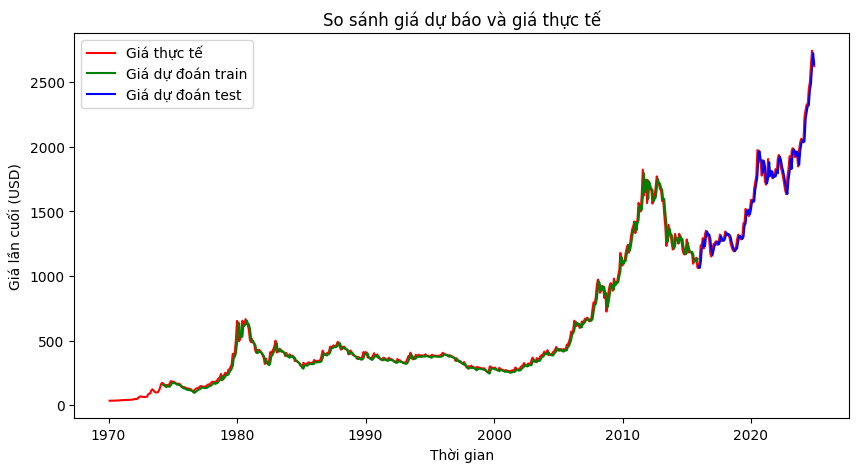

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:550]
test_data1 = df1[550:]

plt.figure(figsize=(10,5))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá lần cuối (USD)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (USD):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.990446873444647
Sai số tuyệt đối trung bình trên tập train (USD): 23.948266062011722
Phần trăm sai số tuyệt đối trung bình tập train: 0.04711168592158835


In [ ]:
train_data1

,Lần cuối,Dự đoán
Ngày,,
1974-04-01,169.55,157.892426
1974-05-01,157.25,161.450394
1974-06-01,144.55,153.784653
1974-07-01,156.50,141.668808
1974-08-01,156.30,144.571915
...,...,...
2015-07-01,1095.40,1173.089111
2015-08-01,1134.10,1110.196533
2015-09-01,1114.60,1126.495850


In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (USD):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.9685092154185112
Sai số tuyệt đối trung bình trên tập test (USD): 54.23072350738246
Phần trăm sai số tuyệt đối trung bình tập test: 0.03244525926600767


In [ ]:
test_data1

,Lần cuối,Dự đoán
Ngày,,
2015-12-01,1060.91,1075.870361
2016-01-01,1117.64,1061.375854
2016-02-01,1237.76,1101.293701
2016-03-01,1231.95,1205.647461
2016-04-01,1293.36,1224.595459
...,...,...
2024-08-01,2503.03,2437.825439
2024-09-01,2634.49,2489.346680
2024-10-01,2743.80,2619.673340


In [ ]:
# Tính giá trị phần dư cho tập train
train_data1['Phần dư'] = train_data1['Lần cuối'] - train_data1['Dự đoán']

# Tính giá trị phần dư cho tập test
test_data1['Phần dư'] = test_data1['Lần cuối'] - test_data1['Dự đoán']

<ipython-input-122-d36f3a8f0383>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Phần dư'] = train_data1['Lần cuối'] - train_data1['Dự đoán']
<ipython-input-122-d36f3a8f0383>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Phần dư'] = test_data1['Lần cuối'] - test_data1['Dự đoán']


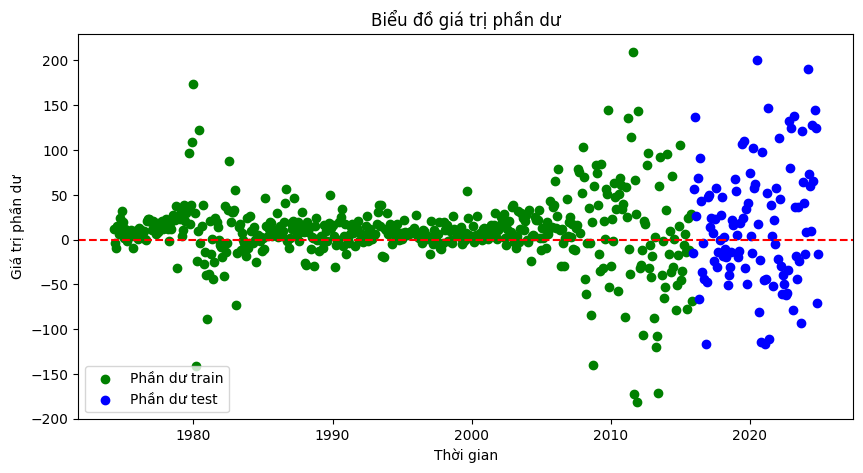

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(train_data1.index, train_data1['Phần dư'], label='Phần dư train', color='green')
plt.scatter(test_data1.index, test_data1['Phần dư'], label='Phần dư test', color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Đường 0 để dễ quan sát
plt.xlabel('Thời gian')
plt.ylabel('Giá trị phần dư')
plt.title('Biểu đồ giá trị phần dư')
plt.legend()
plt.show()

In [ ]:
# Lấy giá trị phần dư từ test_data1
residuals = test_data1['Phần dư'].values

# Tính toán RMSE
rmse = np.sqrt(np.mean(residuals**2))

# In ra kết quả
print('RMSE trên tập kiểm tra:', rmse)

RMSE trên tập kiểm tra: 68.8276939688389


# Thử dự đoán giá tương lai và so sánh với giá ngày cuối

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


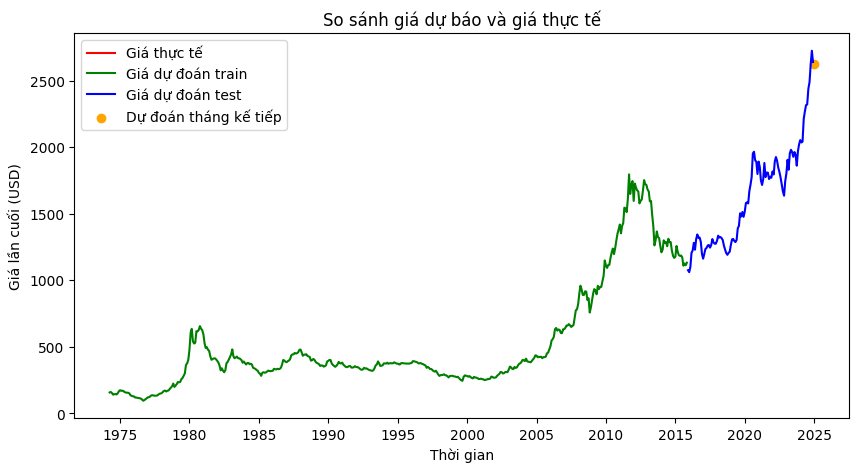

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
#next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Lấy ngày kế tiếp (tháng tiếp theo) sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.DateOffset(months=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Lần cuối'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Lần cuối': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(10, 5))
plt.plot(df1['Ngày'], df1['Lần cuối'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán tháng kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá lần cuối (USD)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()

years = YearLocator(base=5)

# Định dạng đồ thị hiển thị các ngày tháng theo năm
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.show()

In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Lần cuối'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá tháng trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

        Ngày  Giá dự đoán  Giá tháng trước
0 2025-01-01  2622.663574          2623.81


# Test

In [ ]:
def predict_multiple_months(model, sc, data, num_months):
    """Dự đoán giá vàng cho num_months tháng tới.

    Args:
        model: Mô hình LSTM đã được huấn luyện.
        sc: MinMaxScaler được sử dụng để chuẩn hóa dữ liệu.
        data: Dữ liệu giá vàng.
        num_months: Số tháng cần dự đoán.

    Returns:
        Một DataFrame chứa ngày và giá dự đoán cho num_months tháng tới.
    """

    predictions = []
    current_data = data[-50:].reshape(-1, 1)  # Lấy 50 giá trị gần nhất làm dữ liệu ban đầu

    for _ in range(num_months):
        current_data_normalized = sc.transform(current_data)
        x_input = current_data_normalized[-50:].reshape(1, 50, 1)  # Tạo input cho mô hình
        y_pred = model.predict(x_input)
        y_pred_inverse = sc.inverse_transform(y_pred)  # Chuyển về giá trị thực

        predictions.append(y_pred_inverse[0][0])  # Lưu giá trị dự đoán
        current_data = np.append(current_data, y_pred_inverse)  # Cập nhật dữ liệu cho tháng tiếp theo
        current_data = current_data.reshape(-1, 1) # Reshape thành mảng 2 chiều

    # Tạo DataFrame kết quả
    # Lấy ngày cuối cùng trong tập dữ liệu gốc (df)
    last_date = pd.to_datetime(df['Ngày'].iloc[-1])
    # Tạo danh sách ngày trong tương lai, bắt đầu từ tháng tiếp theo của last_date
    future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=num_months, freq='MS')
    result_df = pd.DataFrame({'Ngày': future_dates, 'Dự đoán': predictions})

    return result_df

# Dự đoán cho 6 tháng tới
future_predictions = predict_multiple_months(final_model, sc, data, num_months=12)
future_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,Ngày,Dự đoán
0,2025-01-01,2622.663574
1,2025-02-01,2618.111084
2,2025-03-01,2609.951904
3,2025-04-01,2599.407227
4,2025-05-01,2586.845215
5,2025-06-01,2572.591797
6,2025-07-01,2557.007568
7,2025-08-01,2540.447510
8,2025-09-01,2523.231934
9,2025-10-01,2505.635254


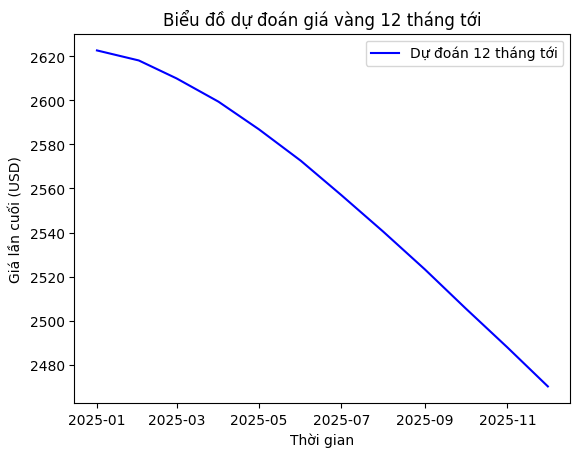

In [ ]:
plt.plot(future_predictions['Ngày'], future_predictions['Dự đoán'], label='Dự đoán 12 tháng tới', color='blue')
plt.xlabel('Thời gian')
plt.ylabel('Giá lần cuối (USD)')
plt.title('Biểu đồ dự đoán giá vàng 12 tháng tới')
plt.legend()
plt.show()

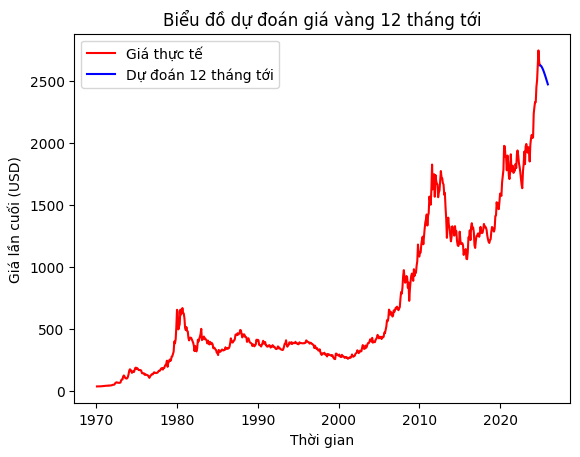

In [ ]:
plt.plot(df['Ngày'], df['Lần cuối'], label='Giá thực tế', color='red')
plt.plot(future_predictions['Ngày'], future_predictions['Dự đoán'], label='Dự đoán 12 tháng tới', color='blue')
plt.xlabel('Thời gian')
plt.ylabel('Giá lần cuối (USD)')
plt.title('Biểu đồ dự đoán giá vàng 12 tháng tới')
plt.legend()
plt.show()

#ESSEMBLE

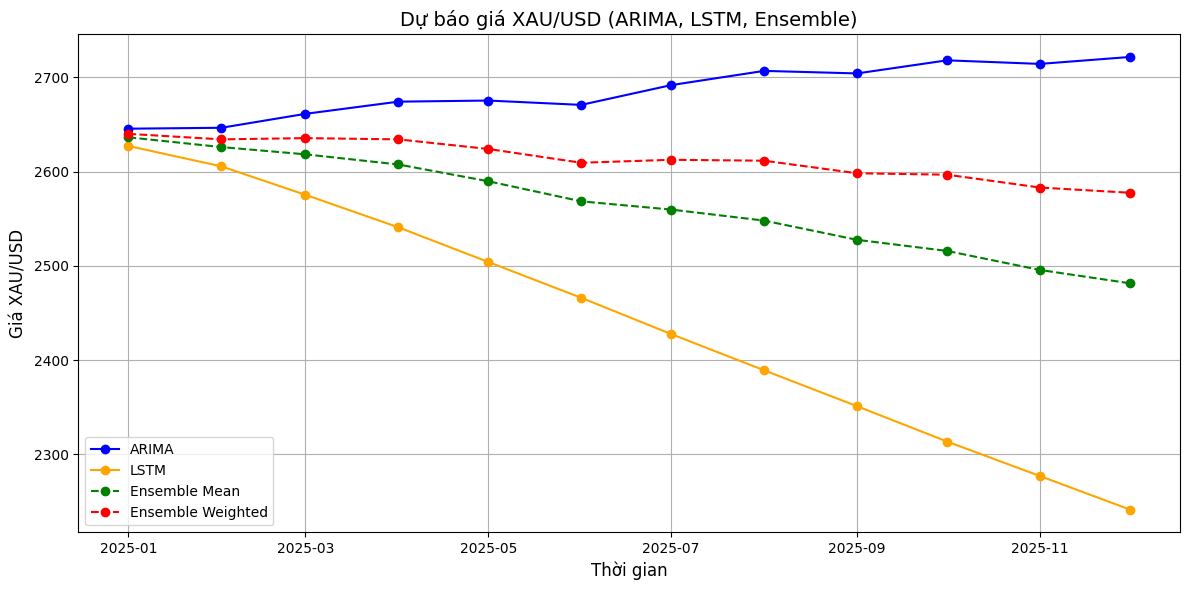

In [ ]:
data = {
    "Date": [
        "1/1/2025", "1/2/2025", "1/3/2025", "1/4/2025", "1/5/2025",
        "1/6/2025", "1/7/2025", "1/8/2025", "1/9/2025", "1/10/2025",
        "1/11/2025", "1/12/2025"
    ],
    "ARIMA": [
        2645.575, 2646.553, 2661.338, 2674.264, 2675.443,
        2670.846, 2691.824, 2706.929, 2704.224, 2718.128,
        2714.342, 2721.700
    ],
    "LSTM": [
        2627.252441, 2605.559326, 2575.418457, 2540.921387, 2504.111816,
        2466.114990, 2427.632324, 2389.151611, 2351.035400, 2313.561279,
        2276.939453, 2241.325195
    ]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Tính trung bình cộng (ensemble cơ bản)
df['Ensemble_Mean'] = (df['ARIMA'] + df['LSTM']) / 2

# Áp dụng trọng số cho ensemble
weight_arima = 0.7
weight_lstm = 0.3
df['Ensemble_Weighted'] = (weight_arima * df['ARIMA'] + weight_lstm * df['LSTM'])

# Chuyển cột Date sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# ARIMA
plt.plot(df['Date'], df['ARIMA'], label='ARIMA', marker='o', linestyle='-', color='blue')

# LSTM
plt.plot(df['Date'], df['LSTM'], label='LSTM', marker='o', linestyle='-', color='orange')

# Ensemble Mean
plt.plot(df['Date'], df['Ensemble_Mean'], label='Ensemble Mean', marker='o', linestyle='--', color='green')

# Ensemble Weighted
plt.plot(df['Date'], df['Ensemble_Weighted'], label='Ensemble Weighted', marker='o', linestyle='--', color='red')

# Thêm tiêu đề, trục và chú thích
plt.title('Dự báo giá XAU/USD (ARIMA, LSTM, Ensemble)', fontsize=14)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Giá XAU/USD', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()